#### introduction of project 


## California housing dataset has total 20640 rows and 10 columns. Each column/feature is explained in detail below.

#### 1.longitude - Longitudes are vertical lines that measure east or west of the meridian in Greenwich. A measure of how far     west a house is; a higher value is farther west.

#### 2.latitude - Latitudes are horizontal lines that measure distance north or south of the equator. A measure of how far north a house is; a higher value is farther north.

#### 3.housing_median_age - Median age of a house within a block; a lower number indicates that it a newer building

#### 4.totalRooms: Total number of rooms within a block

#### 5.totalBedrooms: Total number of bedrooms within a block

#### 6.population: Total number of people residing within a block

#### 7.households: Total number of households, i.e a group of people residing within a home unit, for a block

#### 8.medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

#### 9.medianHouseValue: Median house value for households within a block (measured in US Dollars as the data given is for California,USA)

#### 10.oceanProximity: Location of the house with respect to ocean/sea




In [49]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Reading the dataset into a dataframe
df = pd.read_excel("housing.xlsx")

In [51]:
# checkin shape of the data frame
# there are 20640 rows and 10 columns 
df.shape

(20640, 10)

In [52]:
# checking the datatype of all the columns in the dataframe
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [53]:
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [54]:
# describing the  numerical columns in the dataset
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [55]:
# only total_rooms column contains null values which are 207
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [56]:
# checking if there are any duplicated rows in the dataset 
# There are no duplicate ows in the dataset
df.duplicated().sum()

0

In [57]:
# top 5 rows of the dataframe
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13049,-121.32,38.59,21,9774,1777.0,4674,1712,3.6817,136100,INLAND
12766,-121.42,38.62,33,3171,832.0,1591,695,2.0786,88600,INLAND
7112,-118.01,33.89,36,1589,265.0,804,272,4.6354,202900,<1H OCEAN
12125,-117.24,33.93,12,7105,1447.0,4520,1333,3.2705,113200,INLAND
2028,-119.75,36.71,38,1481,NaN,1543,372,1.4577,49800,INLAND
16107,-122.50,37.75,44,1739,343.0,872,330,2.9632,286300,NEAR OCEAN
5520,-118.39,33.97,46,2198,352.0,839,335,6.5778,350800,<1H OCEAN
4322,-118.35,34.08,52,2088,388.0,908,375,3.8141,342000,<1H OCEAN
12465,-121.43,38.57,46,2443,476.0,939,457,3.5893,142000,INLAND
830,-121.99,37.61,9,3666,711.0,2341,703,4.6458,217000,<1H OCEAN


## 1. What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.


Median income of the datset is 3.8706710029069766


[Text(0, 0.5, 'Frequency_count')]

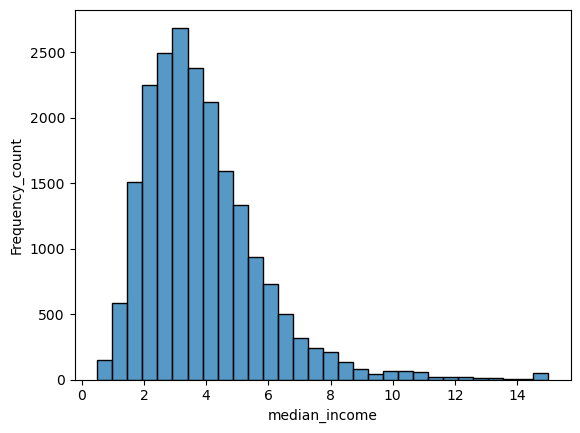

In [58]:
print(f'Median income of the datset is {df["median_income"].mean()}')

fig = sns.histplot(data=df,x=df['median_income'],bins=30)# creating a histogram 
# because histograms are used for univariate analysis(one column)

fig.set(ylabel='Frequency_count')

# The observation shows that the frequency count of median income b/w 2 and 6 maximum and frequency of median income 
# b/w 10 and 14 is very low

## 2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

[Text(0, 0.5, 'Frequency_count')]

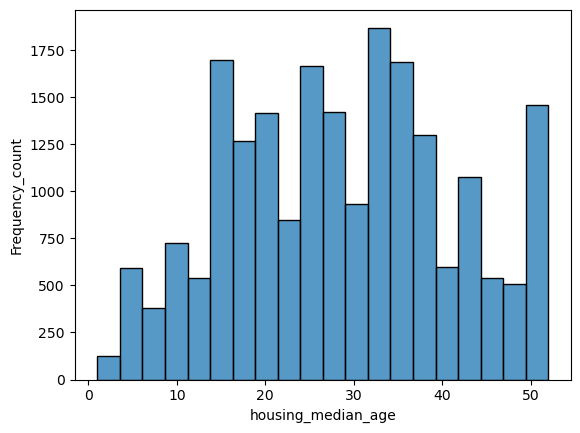

In [59]:
sns.histplot(df,x=df['housing_median_age'],bins=20).set(ylabel='Frequency_count')
# creating a histogram because histograms are used for univariate analysis(one column)


The observation shows that the most of the houses are between 20 to 40 years old and there are very few houses which are less than 10 years old 

## 3.Show with the help of visualization, how median_income and median_house_values are related?

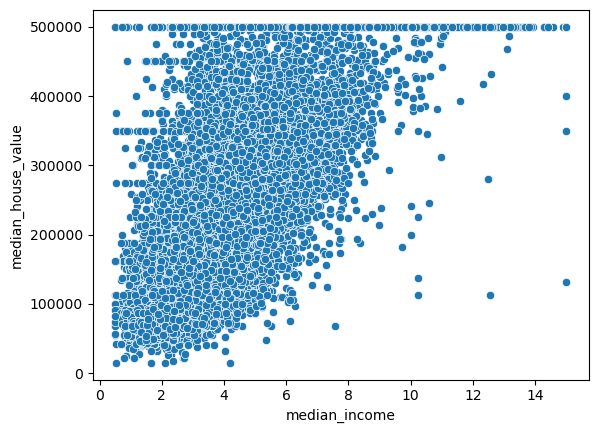

In [74]:
sns.scatterplot(data = df, x = 'median_income', y = 'median_house_value')
plt.show()

With the rise in the median income there is a rise in median house value so there is a positive relationship b/w these two variables. It means that there is a high chance of buying a high value property with a increase in income

## 4.Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.

In [61]:
bedrooms = df[~df['total_bedrooms'].isnull()]
bedrooms

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


## 5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.

In [62]:
bed_mean = df['total_bedrooms'].mean()
bed_mean

537.8705525375618

In [63]:
df = df.fillna(bed_mean)
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7010,-118.08,33.97,38,1026,190.0,789,193,4.2000,163200,<1H OCEAN
15616,-122.42,37.81,52,1314,317.0,473,250,4.3472,500001,NEAR BAY
13477,-117.39,34.07,15,1966,331.0,1118,323,3.8558,122700,INLAND
9446,-119.84,37.48,17,2582,553.0,1087,423,2.5000,104200,INLAND
5746,-118.26,34.16,20,3407,885.0,1883,870,3.7321,351100,<1H OCEAN
19726,-121.70,39.07,26,2668,510.0,1437,505,3.3125,100000,INLAND
15241,-117.23,32.99,17,2718,326.0,1011,319,15.0001,500001,NEAR OCEAN
11415,-117.97,33.69,21,4112,580.0,1886,581,6.7990,292000,<1H OCEAN
16990,-122.27,37.55,15,1958,282.0,811,284,8.1221,483300,NEAR BAY
17597,-121.89,37.30,47,1604,284.0,639,278,5.8415,283300,<1H OCEAN


In [64]:
df['total_bedrooms'].isnull().sum() # as u can see there are no null values

0

## 6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.



In [65]:
def mediann(c):
    '''Function to find the median of a dataset
       dataframe name (optional along with column name) 
       should be provided in place of c'''
    return c.median()

In [66]:
mediann(df['total_rooms'])

2127.0

## 7.Plot latitude versus longitude and explain your observations.

<Axes: xlabel='latitude', ylabel='longitude'>

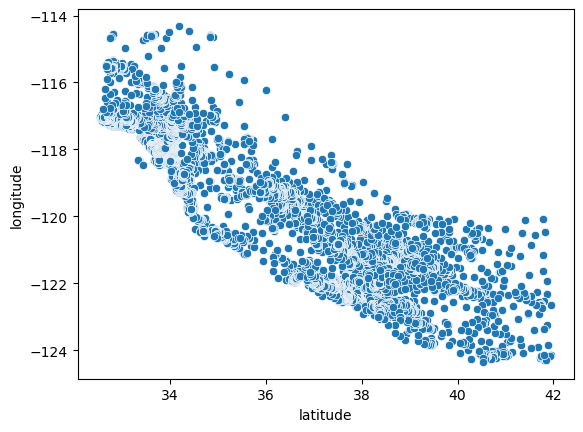

In [67]:
sns.scatterplot(data = df, x='latitude', y='longitude')
# scatter plot is used to find the relationship between two values 


The observation from the below plot is that, with increase in latitude ,longitude decreases it means that the longitude and latitude are not dependent on each other.
We can say that latitude and longitude are negatively correlated to each other 

## 8. Create a data set for which the ocean_proximity is ‘Near ocean’.



In [68]:
df_near_ocean = df[df['ocean_proximity']=='NEAR OCEAN']

In [69]:
df_near_ocean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


## 9. Find the mean and median of the median income for the data set created in question 8.



In [70]:
df_near_ocean['median_income'].mean()

4.0057848006019565

In [71]:
df_near_ocean['median_income'].median()

3.64705

## 10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.



In [75]:
total_bedroom_size = []  # creating a empty list 

# iterating over the list and appending the values
for i in df['total_bedrooms']:
    if i <=10:
        total_bedroom_size.append('small')
    elif i >=11 and i<1000:
        total_bedroom_size.append('medium')
    else:
        total_bedroom_size.append('large')

In [73]:
df['total_bedrooms_size'] = total_bedroom_size
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_size
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,medium
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,large
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,medium
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,medium
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,medium
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,medium
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,medium
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,medium
